In [7]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# load datasets
Customer_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagement_df= pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
marketing_df= pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
transactions_df=pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')

In [9]:
# printing the first five rows of the customer dataset
Customer_df.head()

customer_id   join_date last_purchase_date   age  gender           location
0            1  2023-11-20         2024-03-17  56.0  Female  North Shannonbury
1            2  2021-09-08         2023-10-25   NaN    Male          Hillville
2            3  2021-06-01         2022-11-27   NaN     NaN   North Latoyatown
3            4  2022-01-01         2022-09-01  29.0    Male          Grossstad
4            5  2022-01-24         2023-06-02   NaN    Male   East Matthewfort

In [10]:
# printing the first five rows of the engagement dataset
engagement_df.head()

customer_id  number_of_site_visits  number_of_emails_opened  \
0            1                     10                       15   
1            2                    285                       49   
2            3                    192                       73   
3            4                    110                       30   
4            5                    161                        2   

   number_of_clicks  
0                 1  
1                51  
2                25  
3                17  
4                 7

In [11]:
# printing the first five rows of the marketing dataset
marketing_df.head()

campaign_id  customer_id response   promotion_type campaign_date
0            1            1       No  Buy One Get One    2024-02-29
1            2            1       No         Discount    2024-01-24
2            3            1       No    Free Shipping    2024-03-05
3            4            1      Yes  Buy One Get One    2024-01-10
4            5            2      Yes    Free Shipping    2022-07-08

In [12]:
# printing the first five rows of the transactions dataset
transactions_df.head()

transaction_id  customer_id transaction_date  transaction_amount  \
0               1            1       2024-02-03              165.56   
1               2            1       2024-03-02              699.01   
2               3            1       2024-03-12              146.86   
3               4            1       2024-01-20              927.46   
4               5            1       2024-02-25             1395.87   

  product_category  
0         Clothing  
1       Home Goods  
2       Home Goods  
3      Electronics  
4      Electronics

In [13]:
# determining rows and columns of each data set
Customer_df.shape

(10000, 6)

In [14]:
engagement_df.shape

(10000, 4)

In [15]:
transactions_df.shape

(129545, 5)

In [16]:
marketing_df.shape

(25200, 5)

In [17]:
# Merging the 4 data sets into 1
df = Customer_df.merge(engagement_df, on='customer_id',how='outer')\
                .merge(marketing_df, on='customer_id', how='outer')\
                .merge(transactions_df, on='customer_id', how='outer')

print(df)

        customer_id   join_date last_purchase_date   age  gender  \
0                 1  2023-11-20         2024-03-17  56.0  Female   
1                 1  2023-11-20         2024-03-17  56.0  Female   
2                 1  2023-11-20         2024-03-17  56.0  Female   
3                 1  2023-11-20         2024-03-17  56.0  Female   
4                 1  2023-11-20         2024-03-17  56.0  Female   
...             ...         ...                ...   ...     ...   
327246        10000  2023-05-26         2023-09-01  67.0    Male   
327247        10000  2023-05-26         2023-09-01  67.0    Male   
327248        10000  2023-05-26         2023-09-01  67.0    Male   
327249        10000  2023-05-26         2023-09-01  67.0    Male   
327250        10000  2023-05-26         2023-09-01  67.0    Male   

                 location  number_of_site_visits  number_of_emails_opened  \
0       North Shannonbury                     10                       15   
1       North Shannonbury    

In [18]:
# Eliminate duplicates based on customer id
df.drop_duplicates(subset='customer_id',keep='first', inplace=True)

In [19]:
# Reviewing the data - looking for outliers
df.describe()

customer_id          age  number_of_site_visits  \
count  10000.00000  8991.000000           10000.000000   
mean    5000.50000    43.467467             100.111900   
std     2886.89568    15.094380             118.625052   
min        1.00000    18.000000               1.000000   
25%     2500.75000    30.000000              15.000000   
50%     5000.50000    44.000000              53.000000   
75%     7500.25000    57.000000             141.000000   
max    10000.00000    69.000000             711.000000   

       number_of_emails_opened  number_of_clicks   campaign_id  \
count             10000.000000      10000.000000  10000.000000   
mean                 39.862100         19.725300  12605.207500   
std                  46.511719         22.975083   7284.620092   
min                   1.000000          1.000000      1.000000   
25%                   6.000000          3.000000   6273.250000   
50%                  22.000000         11.000000  12599.500000   
75%                  57.000000         28.000000  18930.500000   
max                 303.000000        142.000000  25199.000000   

       transaction_id  transaction_amount  
count    10000.000000        10000.000000  
mean     64788.964600          607.624464  
std      37459.595865          497.576292  
min          1.000000           10.020000  
25%      32493.750000          233.885000  
50%      64691.000000          439.665000  
75%      97417.000000          863.667500  
max     129536.000000         1999.740000

In [20]:
# Isolate possible outlier for review
df[df['number_of_site_visits']==711]

customer_id   join_date last_purchase_date   age  gender  \
131986         4053  2020-04-25         2024-04-27  33.0  Female   

               location  number_of_site_visits  number_of_emails_opened  \
131986  New Douglasstad                    711                       17   

        number_of_clicks  campaign_id response promotion_type campaign_date  \
131986                 1        10180       No       Discount    2022-11-04   

        transaction_id transaction_date  transaction_amount product_category  
131986           52459       2021-07-20               249.5         Clothing

In [21]:
#Review structural information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 327231
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              10000 non-null  int64  
 1   join_date                10000 non-null  object 
 2   last_purchase_date       10000 non-null  object 
 3   age                      8991 non-null   float64
 4   gender                   9467 non-null   object 
 5   location                 10000 non-null  object 
 6   number_of_site_visits    10000 non-null  int64  
 7   number_of_emails_opened  10000 non-null  int64  
 8   number_of_clicks         10000 non-null  int64  
 9   campaign_id              10000 non-null  int64  
 10  response                 10000 non-null  object 
 11  promotion_type           10000 non-null  object 
 12  campaign_date            10000 non-null  object 
 13  transaction_id           10000 non-null  int64  
 14  transaction_date         1

In [22]:
#  Fill null values with mean for age and gender
mean_age = df['age'].mean()
df['age'] = df['age'].fillna(mean_age)

df['gender'] = df['gender'].fillna('Unknown')

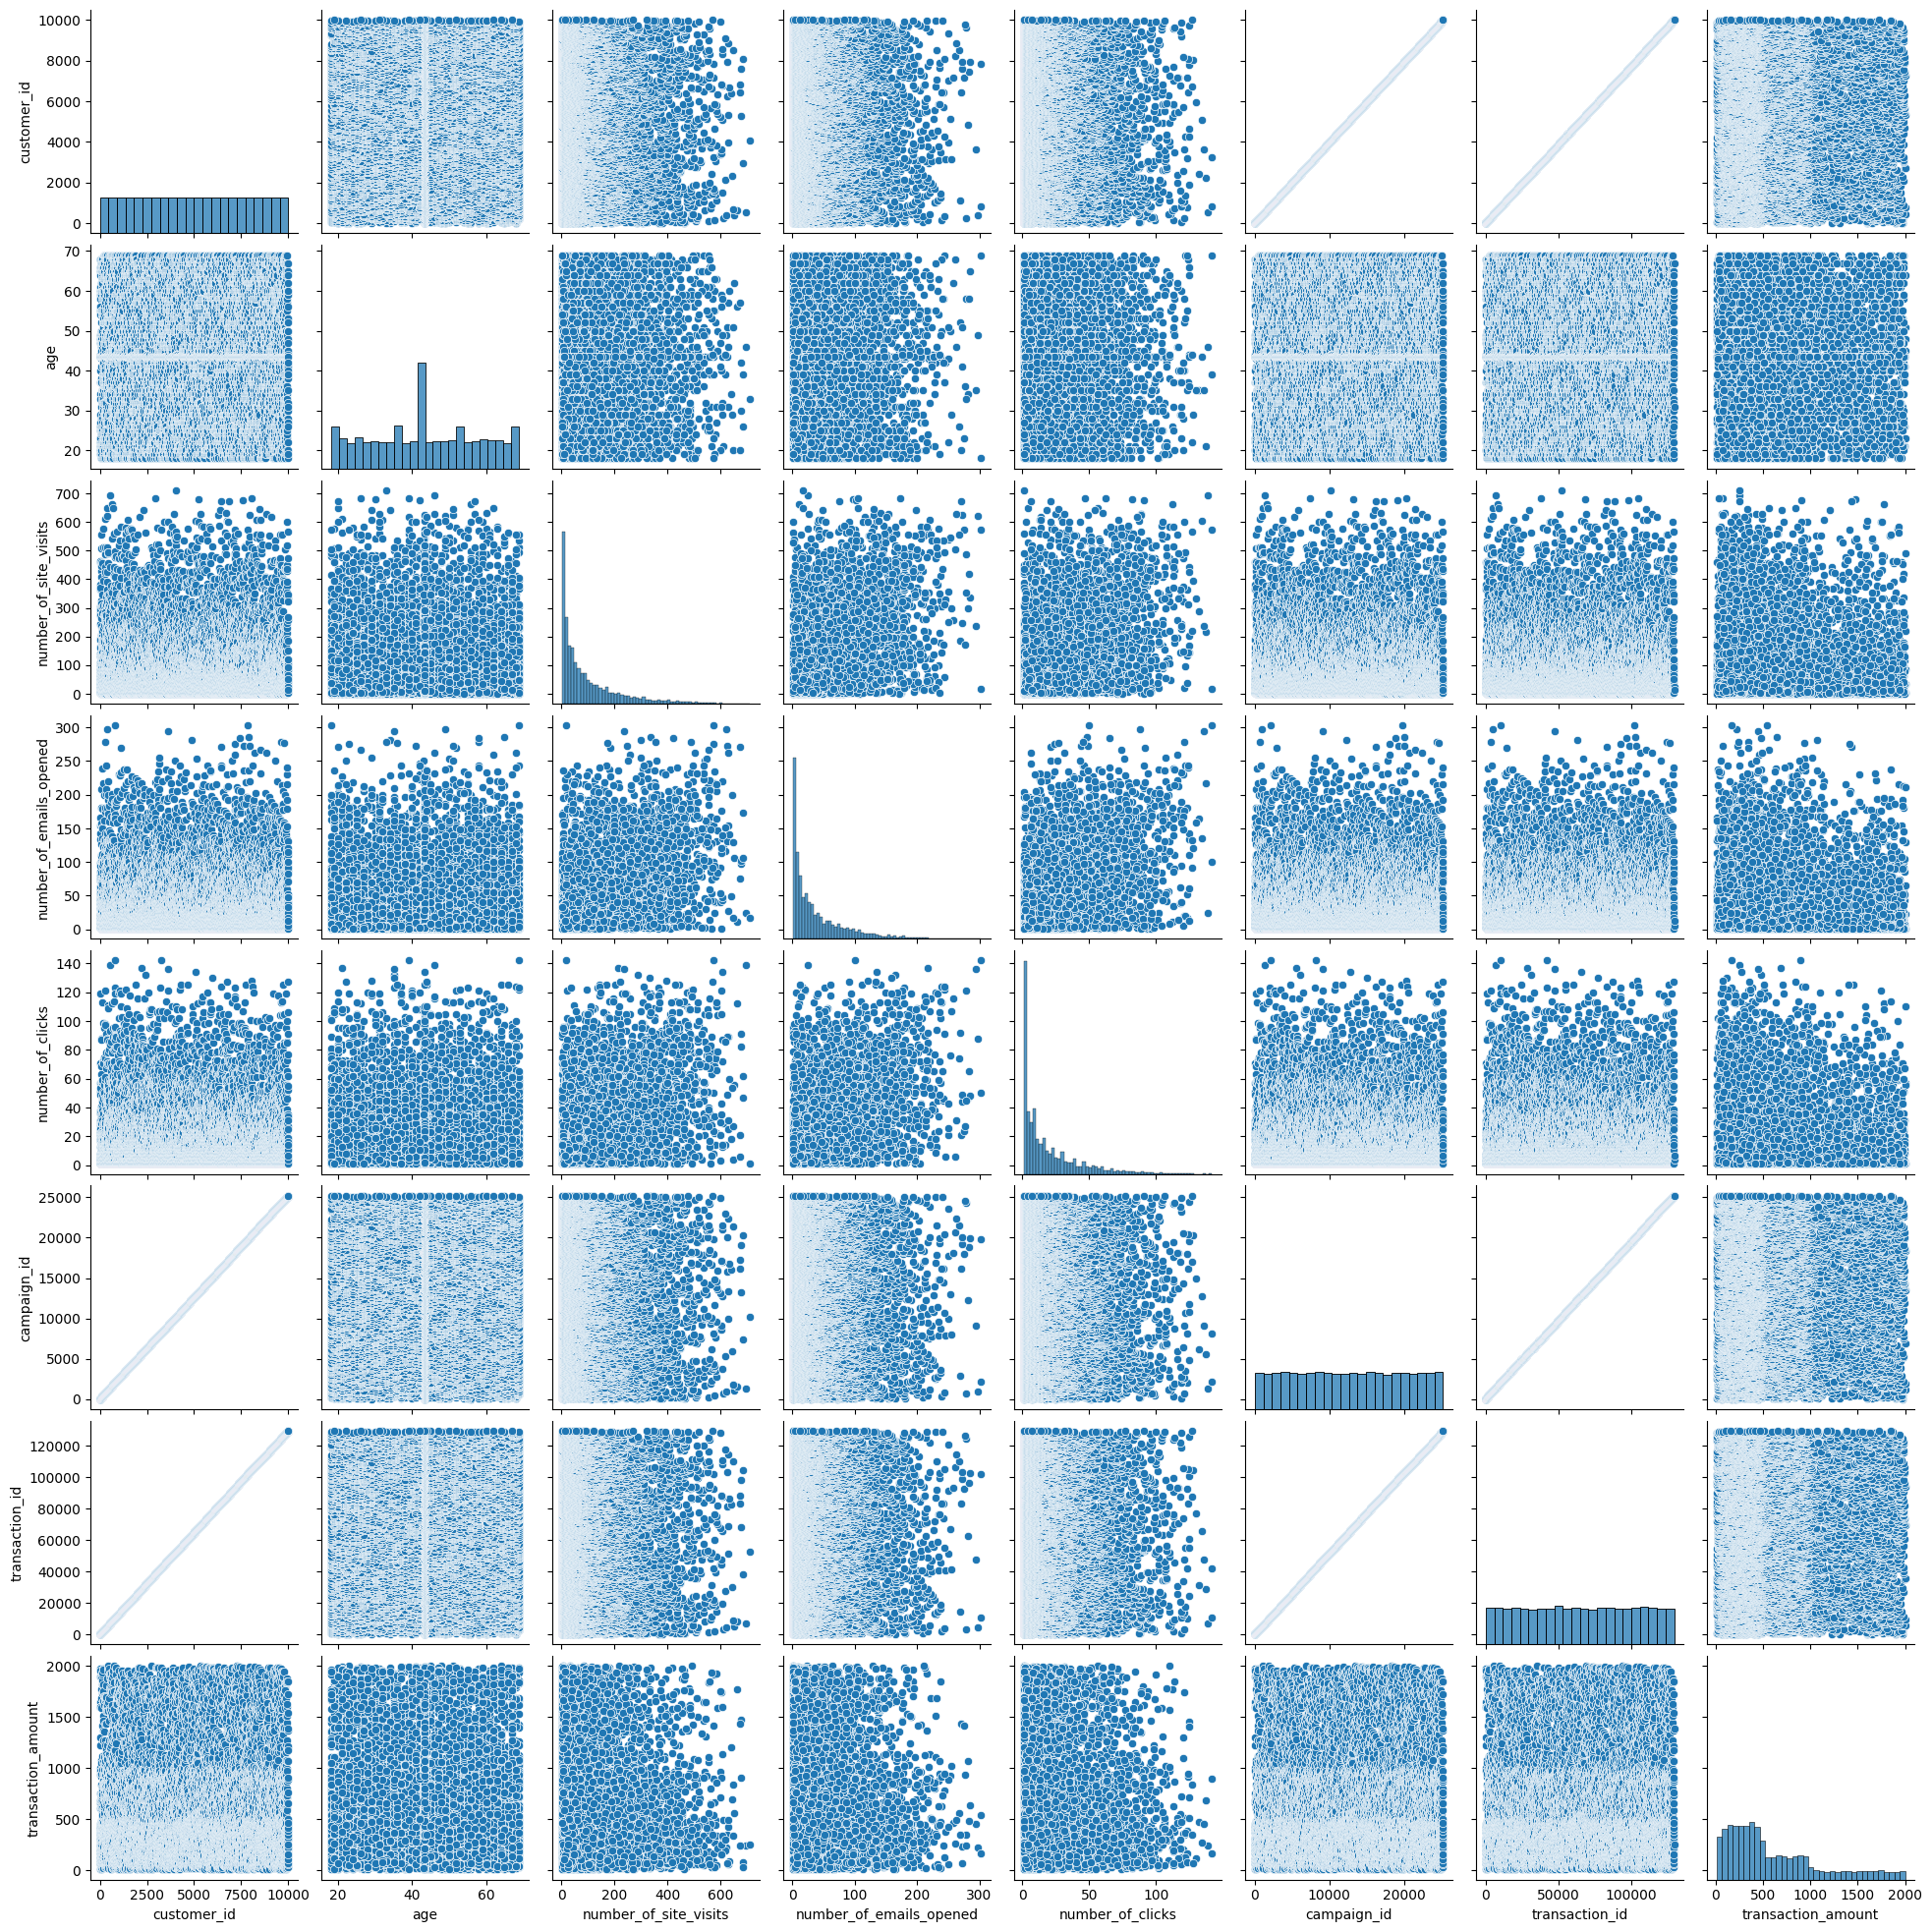

In [23]:
#  plotting data to look for relationships
sns.pairplot(df)

In [24]:
# review data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 327231
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              10000 non-null  int64  
 1   join_date                10000 non-null  object 
 2   last_purchase_date       10000 non-null  object 
 3   age                      10000 non-null  float64
 4   gender                   10000 non-null  object 
 5   location                 10000 non-null  object 
 6   number_of_site_visits    10000 non-null  int64  
 7   number_of_emails_opened  10000 non-null  int64  
 8   number_of_clicks         10000 non-null  int64  
 9   campaign_id              10000 non-null  int64  
 10  response                 10000 non-null  object 
 11  promotion_type           10000 non-null  object 
 12  campaign_date            10000 non-null  object 
 13  transaction_id           10000 non-null  int64  
 14  transaction_date         1

In [25]:
df.describe()

customer_id           age  number_of_site_visits  \
count  10000.00000  10000.000000           10000.000000   
mean    5000.50000     43.467467             100.111900   
std     2886.89568     14.312544             118.625052   
min        1.00000     18.000000               1.000000   
25%     2500.75000     32.000000              15.000000   
50%     5000.50000     43.467467              53.000000   
75%     7500.25000     55.000000             141.000000   
max    10000.00000     69.000000             711.000000   

       number_of_emails_opened  number_of_clicks   campaign_id  \
count             10000.000000      10000.000000  10000.000000   
mean                 39.862100         19.725300  12605.207500   
std                  46.511719         22.975083   7284.620092   
min                   1.000000          1.000000      1.000000   
25%                   6.000000          3.000000   6273.250000   
50%                  22.000000         11.000000  12599.500000   
75%                  57.000000         28.000000  18930.500000   
max                 303.000000        142.000000  25199.000000   

       transaction_id  transaction_amount  
count    10000.000000        10000.000000  
mean     64788.964600          607.624464  
std      37459.595865          497.576292  
min          1.000000           10.020000  
25%      32493.750000          233.885000  
50%      64691.000000          439.665000  
75%      97417.000000          863.667500  
max     129536.000000         1999.740000

<Axes: xlabel='transaction_amount', ylabel='Count'>

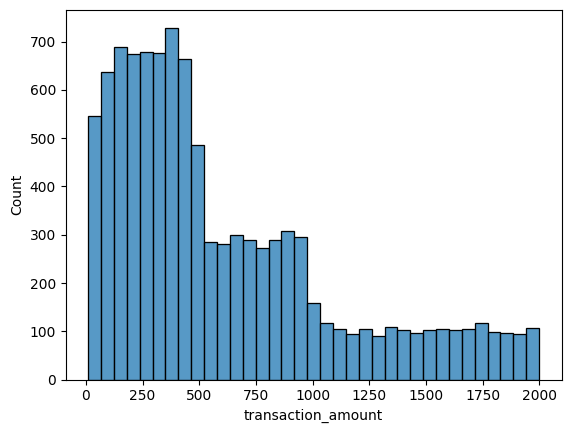

In [32]:
# understand the output
sns.histplot(df['transaction_amount'])

<Axes: ylabel='transaction_amount'>

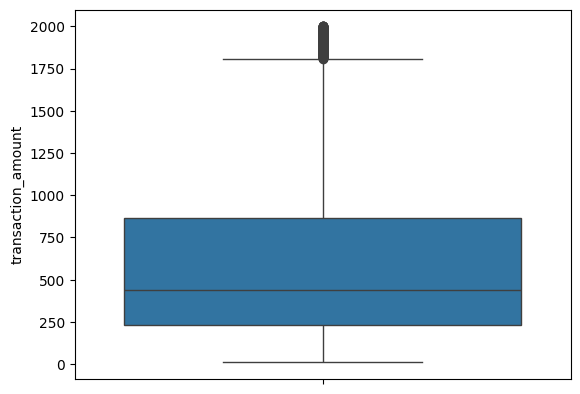

In [33]:
sns.boxplot(df['transaction_amount'])

<Axes: ylabel='transaction_amount'>

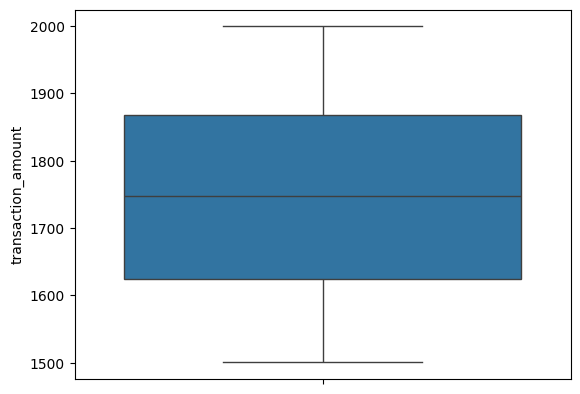

In [34]:
sns.boxplot(df[df['transaction_amount']>1500]['transaction_amount'])

<Axes: xlabel='number_of_site_visits', ylabel='number_of_emails_opened'>

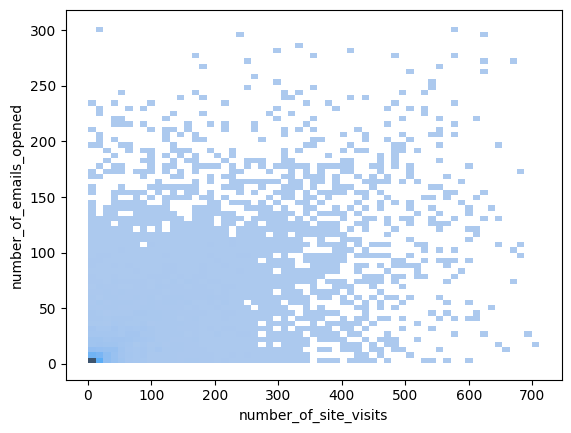

In [31]:
# spread of site_visits
sns.histplot(x='number_of_site_visits',y='number_of_emails_opened', data = df)

array([[<Axes: title={'center': 'customer_id'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'number_of_site_visits'}>],
       [<Axes: title={'center': 'number_of_emails_opened'}>,
        <Axes: title={'center': 'number_of_clicks'}>,
        <Axes: title={'center': 'campaign_id'}>],
       [<Axes: title={'center': 'transaction_id'}>,
        <Axes: title={'center': 'transaction_amount'}>, <Axes: >]],
      dtype=object)

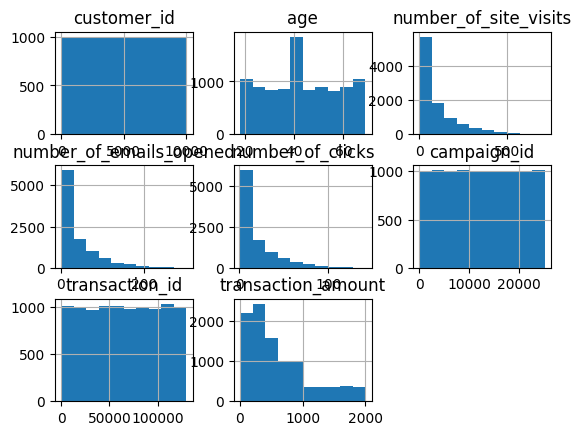

In [35]:
df.hist()

In [42]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['join_date'] = pd.to_datetime(df['join_date'])
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])

# Calculate total revenue and number of purchases
total_revenue = df['transaction_amount'].sum()
number_of_purchases = df['transaction_id'].count()

# Calculate average purchase value (APV) 
apv = total_revenue / number_of_purchases

# Calculate average purchase frequency rate (APFR)
number_of_customers = df['customer_id'].nunique()
apfr = number_of_purchases / number_of_customers

# Calculate customer value (CLV)
cv = apv * apfr

# Calculate average customer lifespan (ACL)
customer_lifespans = df.groupby('customer_id').apply(lambda x: (x['last_purchase_date'].max() - x['join_date'].min()).days)

# Convert days to years
acl = customer_lifespans.mean() / 365 

# Calculate customer lifetime value (CLV)
clv = cv * acl

print(f'Average Purchase Value (APV): {apv}')
print(f"Average Purchase Frequency Rate (APFR): {apfr}")
print(f"Customer Value (CV): {cv}")
print(f"Average Customer Lifespan (ACL): {acl} years")
print(f"Customer Lifetime Value (CLV): {clv}")

Average Purchase Value (APV): 607.624464
Average Purchase Frequency Rate (APFR): 1.0
Customer Value (CV): 607.624464
Average Customer Lifespan (ACL): 1.1023934246575342 years
Customer Lifetime Value (CLV): 669.8412137746586


C:\Users\tauny\AppData\Local\Temp\ipykernel_36796\899330342.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  customer_lifespans = df.groupby('customer_id').apply(lambda x: (x['last_purchase_date'].max() - x['join_date'].min()).days)


In [43]:
# Store metrics in a dictionary for visualization
metrics = {
    'Average Purchase Value (APV)': apv,
    'Average Purchase Frequency Rate (APFR)': apfr,
    'Customer Value (CV)': cv,
    'Average Customer Lifespan (ACL)': acl,
    'Customer Lifetime Value (CLV)': clv
}

In [44]:
# Create a dataframe from the metrics dictionary
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])

In [45]:
# Plot metrics
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'APV and APFR')

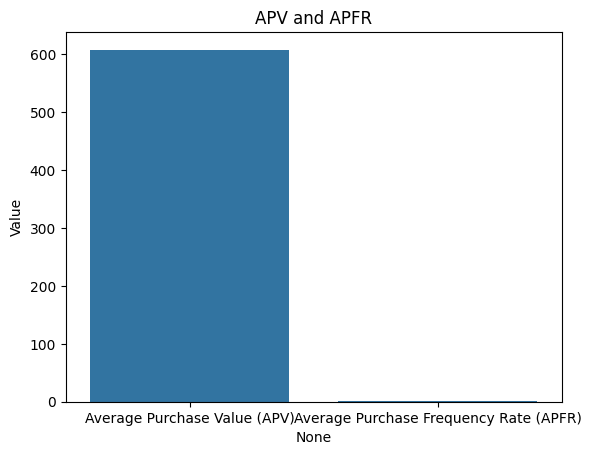

In [47]:
# Bar chart for APV & APFR

sns.barplot(x=metrics_df.index[:2], y=metrics_df['Value'][:2])
plt.title('APV and APFR')

C:\Users\tauny\AppData\Local\Temp\ipykernel_36796\2657412454.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sns.histplot(df.groupby('customer_id').apply(lambda x: (x['transaction_amount'].sum() / len (x))), kde = True)


Text(0.5, 0, 'Customer Value (CV)')

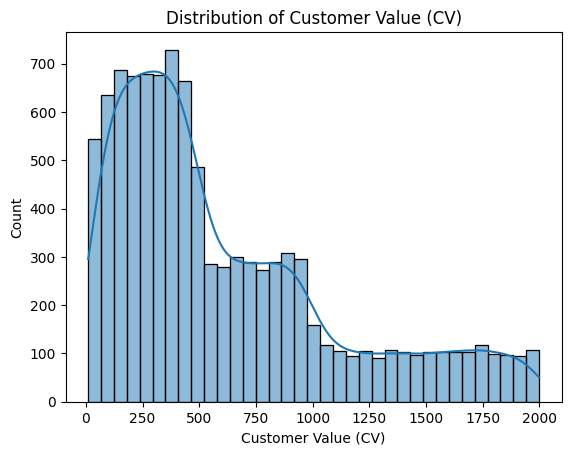

In [48]:
# Histogram for Cv
sns.histplot(df.groupby('customer_id').apply(lambda x: (x['transaction_amount'].sum() / len (x))), kde = True)
plt.title('Distribution of Customer Value (CV)')
plt.xlabel('Customer Value (CV)')

Text(0, 0.5, 'Average Lifespan (Years)')

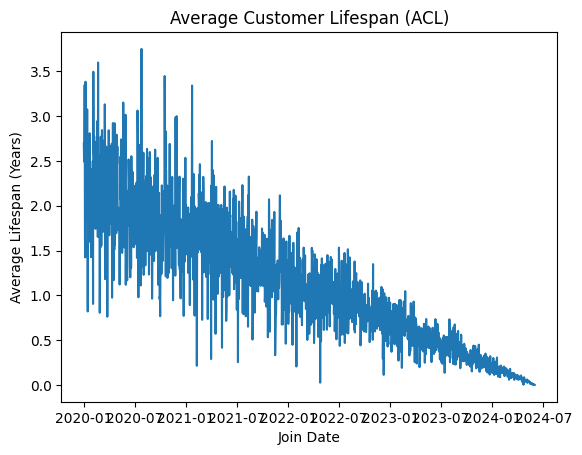

In [54]:
# Create a DataFrame with customer_id and their respective lifespans
lifespans_df = pd.DataFrame({'customer_id': customer_lifespans.index, 'lifespan_days': customer_lifespans.values})

# Merge with the original DataFrame to get join dates
lifespans_df = lifespans_df.merge(df[['customer_id', 'join_date']].drop_duplicates(), on='customer_id')

# Group by join_date and calculate the average lifespan in years
average_lifespans = lifespans_df.groupby('join_date')['lifespan_days'].mean() / 365

# Reset the index to use join_date as a column
average_lifespans = average_lifespans.reset_index()

# Line chart for ACL
sns.lineplot(x='join_date', y = 'lifespan_days', data=average_lifespans)
plt.title('Average Customer Lifespan (ACL)')
plt.xlabel('Join Date')
plt.ylabel('Average Lifespan (Years)')

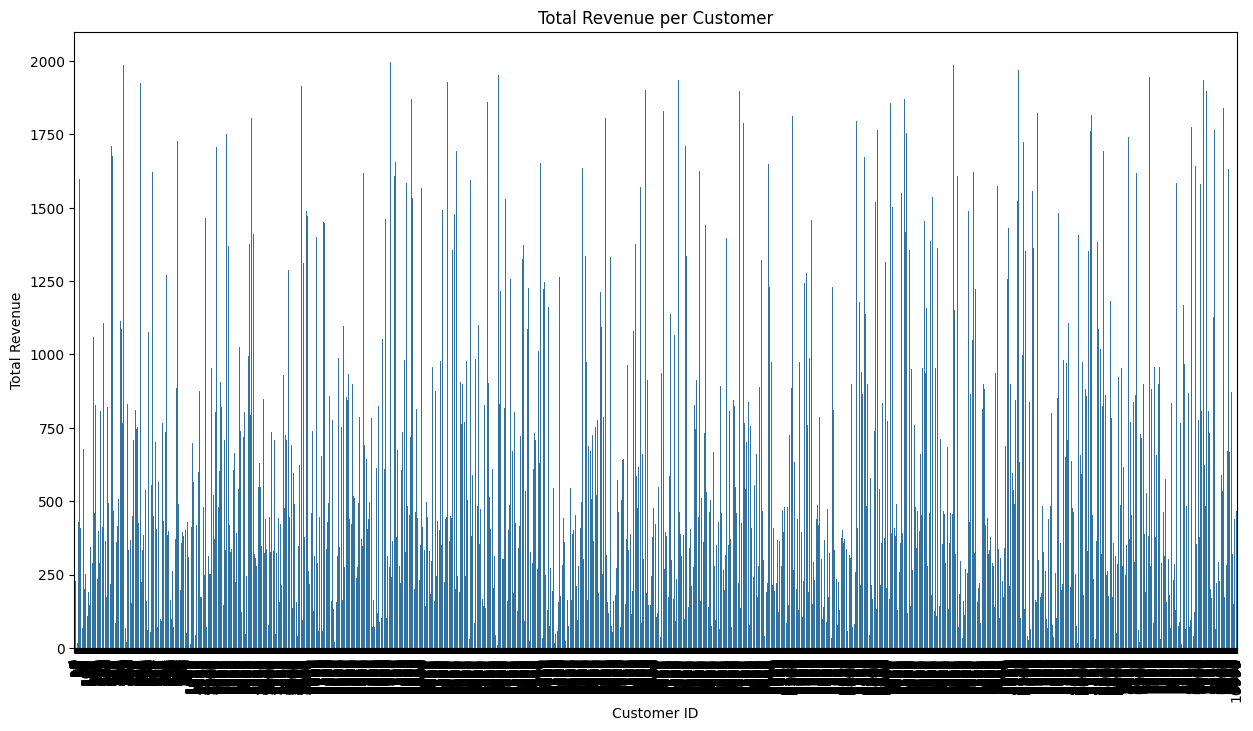

In [61]:
# Calculate total revenue per customer
total_revenue_per_customer = df.groupby('customer_id')['transaction_amount'].sum().reset_index()
total_revenue_per_customer.columns = ['customer_id', 'total_revenue']

# Sort by total revenue for better visualization
total_revenue_per_customer = total_revenue_per_customer.sort_values(by='total_revenue', ascending=False)

# Plotting the total revenue per customer
plt.figure(figsize=(15, 8))
sns.barplot(x='customer_id', y='total_revenue', data=total_revenue_per_customer)
plt.title('Total Revenue per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90) 
plt.show()


In [68]:
# Descriptive stats on total rev per customer (to determine )
print(total_revenue_per_customer['total_revenue'].describe())


count    10000.000000
mean       607.624464
std        497.576292
min         10.020000
25%        233.885000
50%        439.665000
75%        863.667500
max       1999.740000
Name: total_revenue, dtype: float64


In [72]:
# Get the mode of total revenue per customer
print(total_revenue_per_customer['total_revenue'].mode()[0])

58.74


In [73]:
import datetime

In [101]:
# Today's date for recency calculation
today_date = pd.to_datetime('2024-07-01')

# Calculate RFM metrics
rfm_df = df.groupby('customer_id').agg({
    'transaction_date': lambda x: (today_date - x.max()).days,
    'transaction_id' : 'count',
    'transaction_amount': 'sum'
    }).reset_index()

# Rename columns for clarity
rfm_df.columns = ['customer_id', 'recency', 'frequency','monetary']

# Define RFM score thresholds
quantiles = rfm_df[['recency','frequency','monetary']].quantile([0.33,0.66]).to_dict()

# Function to calculate RFM scores
def rfm_score(x,p,d):
    if x <= d[p][0.33]:
        return 1
    elif x <= d[p][0.66]:
        return 2
    else: 
        return 3
    
# Apply RFM scores
rfm_df['recency_score'] = rfm_df['recency'].apply(rfm_score, args=('recency', quantiles))
rfm_df['frequency_score'] =rfm_df['frequency'].apply(rfm_score, args=('frequency', quantiles))
rfm_df['monetary_score'] = rfm_df['monetary'].apply(rfm_score, args=('monetary', quantiles))

# Calculate total RFM score
rfm_df['RFM_score'] = rfm_df['recency_score'] + rfm_df['frequency_score'] + rfm_df['monetary_score']

# Define customer segments based on RFM score
def segment_customer(score):
    if score >= 7:
        return 'High Value'
    elif score >= 5:
        return 'Medium Value'
    else:
        return "Low Value"

# Segment Customers
rfm_df['customer_segment'] = rfm_df['RFM_score'].apply(segment_customer)

#Display resulting df
print (rfm_df.head)

# Summary of customer segments
segment_summary = rfm_df['customer_segment'].value_counts().reset_index()
segment_summary.columns = ['Segment', 'Count']
print(segment_summary)

<bound method NDFrame.head of       customer_id  recency  frequency  monetary  recency_score  \
0               1      149          1    165.56              1   
1               2      788          1    443.99              2   
2               3      731          1     68.35              2   
3               4      691          1    204.59              2   
4               5      852          1   1977.50              3   
...           ...      ...        ...       ...            ...   
9995         9996      481          1   1726.74              2   
9996         9997      617          1    465.80              2   
9997         9998      182          1   1176.86              1   
9998         9999      721          1    250.62              2   
9999        10000      305          1   1385.55              1   

      frequency_score  monetary_score  RFM_score customer_segment  
0                   1               1          3        Low Value  
1                   1               2    

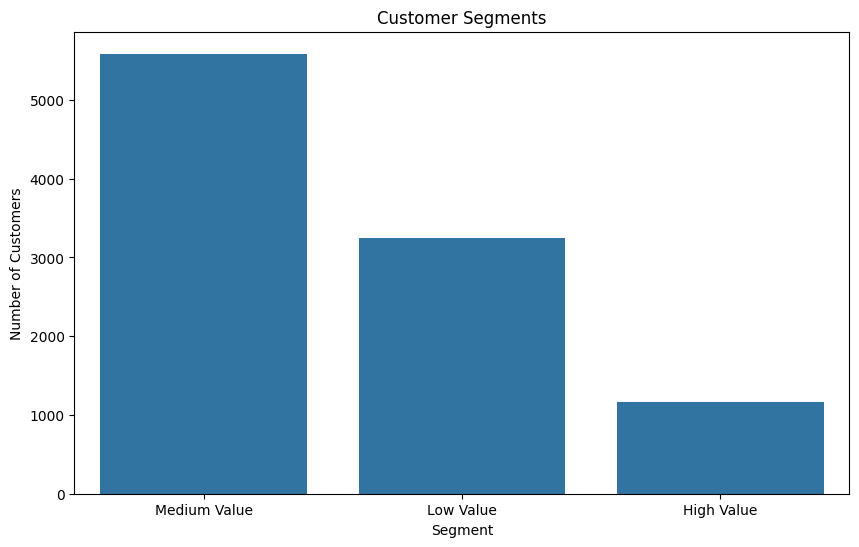

In [102]:
# Visualize the customer segments
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Count', data=segment_summary)
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

In [96]:
rfm_df['RFM_score'].describe()

count    10000.000000
mean         5.019100
std          1.153546
min          3.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          7.000000
Name: RFM_score, dtype: float64

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

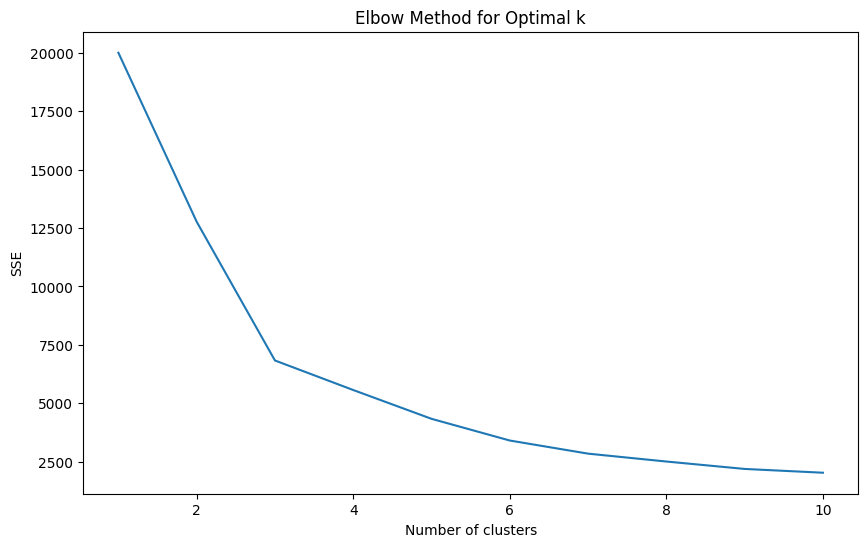

Silhouette Score: 0.44300871604832376


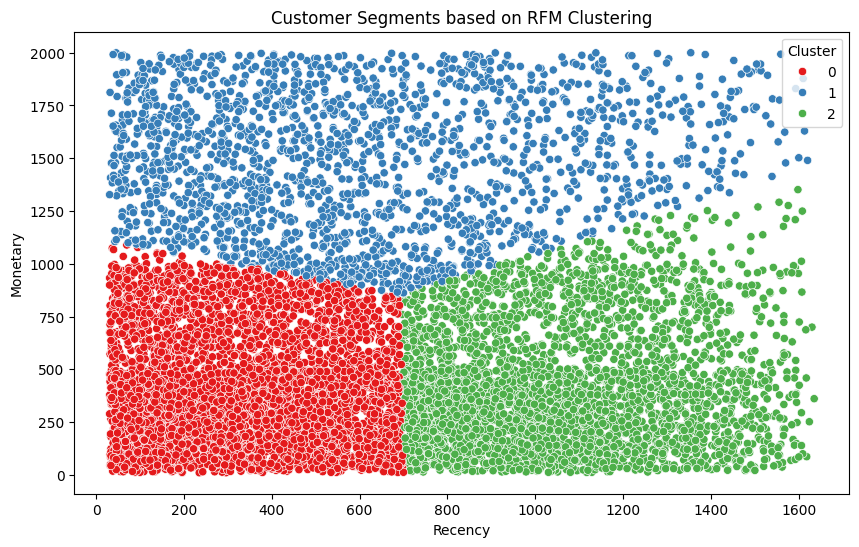

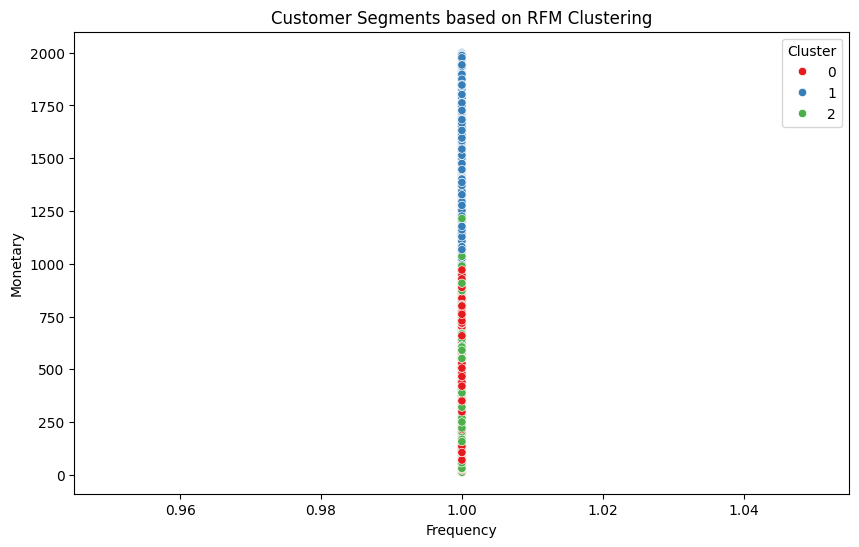

   cluster      recency  frequency     monetary  customer_count
0        0   337.328911        1.0   403.408785            4673
1        1   610.917421        1.0  1469.579409            1877
2        2  1057.194203        1.0   415.279664            3450


In [105]:
# Scale the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['recency', 'frequency', 'monetary']])

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11, 1), sse)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Based on the elbow method
optimal_k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df['cluster'] = kmeans.fit_predict(rfm_scaled)

# Calculate silhouette score to measure the clustering quality
sil_score = silhouette_score(rfm_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recency', y='monetary', hue='cluster', data=rfm_df, palette='Set1')
plt.title('Customer Segments based on RFM Clustering')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='frequency', y='monetary', hue='cluster', data=rfm_df, palette='Set1')
plt.title('Customer Segments based on RFM Clustering')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = rfm_df.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'customer_id': 'count'
}).reset_index().rename(columns={'customer_id': 'customer_count'})

print(cluster_summary)